<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(0_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n20.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.948717,64.710086,-3.083554,118.575249,121.517912,-2.942664
1,0.0,1.0,40.473606,86.353412,-0.787630,136.039388,136.751626,-0.712238
2,0.0,2.0,72.168345,80.109871,-0.529620,161.748596,162.354837,-0.606241
3,0.0,3.0,93.928889,75.244213,2.252833,181.425935,179.351345,2.074590
4,0.0,4.0,66.749330,58.889803,-0.432311,135.206822,135.584110,-0.377287
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,29.680320,85.824644,1.524189,127.029153,125.682193,1.346960
19996,999.0,16.0,27.747163,88.912083,0.019996,126.679242,126.819063,-0.139821
19997,999.0,17.0,88.824577,72.168839,-0.657843,170.335572,170.970921,-0.635348
19998,999.0,18.0,90.614805,50.224531,-0.147853,150.691483,151.005960,-0.314477


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.948717,64.710086,-3.083554,118.575249,121.517912,-2.942664
1,0.0,1.0,40.473606,86.353412,-0.787630,136.039388,136.751626,-0.712238
2,0.0,2.0,72.168345,80.109871,-0.529620,161.748596,162.354837,-0.606241
3,0.0,3.0,93.928889,75.244213,2.252833,181.425935,179.351345,2.074590
4,0.0,4.0,66.749330,58.889803,-0.432311,135.206822,135.584110,-0.377287
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,29.680320,85.824644,1.524189,127.029153,125.682193,1.346960
19996,999.0,16.0,27.747163,88.912083,0.019996,126.679242,126.819063,-0.139821
19997,999.0,17.0,88.824577,72.168839,-0.657843,170.335572,170.970921,-0.635348
19998,999.0,18.0,90.614805,50.224531,-0.147853,150.691483,151.005960,-0.314477


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.948717  64.710086 -3.083554  118.575249  121.517912 -2.942664
      1.0    40.473606  86.353412 -0.787630  136.039388  136.751626 -0.712238
      2.0    72.168345  80.109871 -0.529620  161.748596  162.354837 -0.606241
      3.0    93.928889  75.244213  2.252833  181.425935  179.351345  2.074590
      4.0    66.749330  58.889803 -0.432311  135.206822  135.584110 -0.377287
...                ...        ...       ...         ...         ...       ...
999.0 15.0   29.680320  85.824644  1.524189  127.029153  125.682193  1.346960
      16.0   27.747163  88.912083  0.019996  126.679242  126.819063 -0.139821
      17.0   88.824577  72.168839 -0.657843  170.335572  170.970921 -0.635348
      18.0   90.614805  50.224531 -0.147853  150.691483  151.005960 -0.314477
      19.0   76.496498  56.948482  1.257871  144.702850  143.627879  1.074972

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.948717  64.710086 -3.083554  118.575249  121.517912 -2.942664
      1.0    40.473606  86.353412 -0.787630  136.039388  136.751626 -0.712238
      2.0    72.168345  80.109871 -0.529620  161.748596  162.354837 -0.606241
      3.0    93.928889  75.244213  2.252833  181.425935  179.351345  2.074590
      4.0    66.749330  58.889803 -0.432311  135.206822  135.584110 -0.377287
...                ...        ...       ...         ...         ...       ...
999.0 15.0   29.680320  85.824644  1.524189  127.029153  125.682193  1.346960
      16.0   27.747163  88.912083  0.019996  126.679242  126.819063 -0.139821
      17.0   88.824577  72.168839 -0.657843  170.335572  170.970921 -0.635348
      18.0   90.614805  50.224531 -0.147853  150.691483  151.005960 -0.314477
      19.0   76.496498  56.948482  1.257871  144.702850  143.627879  1.074972

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.948717,64.710086,-3.083554,118.575249,121.517912,-2.942664
1,0.0,1.0,40.473606,86.353412,-0.787630,136.039388,136.751626,-0.712238
2,0.0,2.0,72.168345,80.109871,-0.529620,161.748596,162.354837,-0.606241
3,0.0,3.0,93.928889,75.244213,2.252833,181.425935,179.351345,2.074590
4,0.0,4.0,66.749330,58.889803,-0.432311,135.206822,135.584110,-0.377287
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,29.680320,85.824644,1.524189,127.029153,125.682193,1.346960
19996,999.0,16.0,27.747163,88.912083,0.019996,126.679242,126.819063,-0.139821
19997,999.0,17.0,88.824577,72.168839,-0.657843,170.335572,170.970921,-0.635348
19998,999.0,18.0,90.614805,50.224531,-0.147853,150.691483,151.005960,-0.314477


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.948717  64.710086 -3.083554  118.575249  121.517912 -2.942664
      1.0    40.473606  86.353412 -0.787630  136.039388  136.751626 -0.712238
      2.0    72.168345  80.109871 -0.529620  161.748596  162.354837 -0.606241
      3.0    93.928889  75.244213  2.252833  181.425935  179.351345  2.074590
      4.0    66.749330  58.889803 -0.432311  135.206822  135.584110 -0.377287
...                ...        ...       ...         ...         ...       ...
999.0 15.0   29.680320  85.824644  1.524189  127.029153  125.682193  1.346960
      16.0   27.747163  88.912083  0.019996  126.679242  126.819063 -0.139821
      17.0   88.824577  72.168839 -0.657843  170.335572  170.970921 -0.635348
      18.0   90.614805  50.224531 -0.147853  150.691483  151.005960 -0.314477
      19.0   76.496498  56.948482  1.257871  144.702850  143.627879  1.074972

[20000 rows x 6 columns]

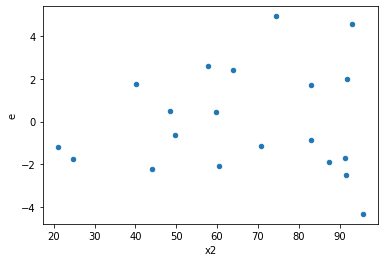

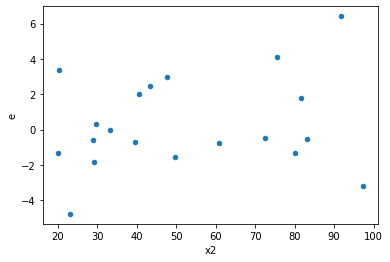

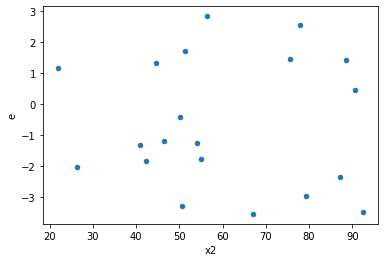

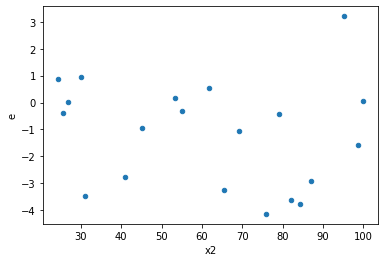

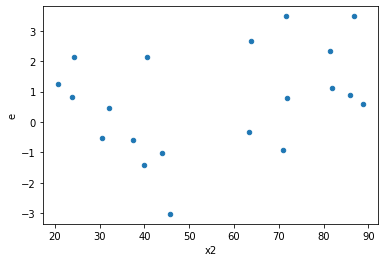

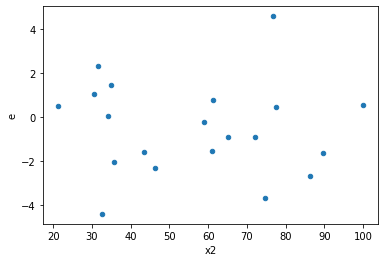

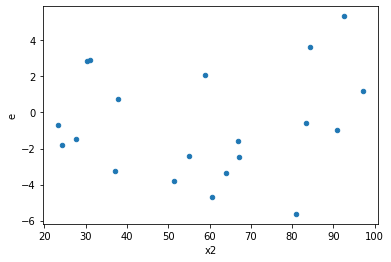

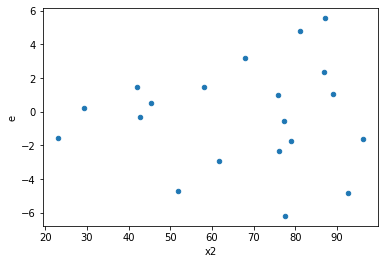

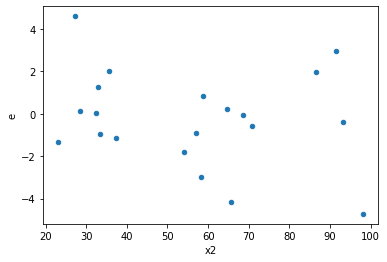

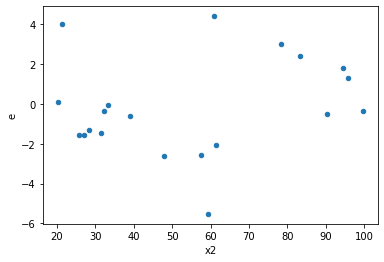

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,6.0,6.0,7.299460148365108,32.54219062177811,1.2165766913941847,5.423698436963019,4.458164023138989,0.09167149947935638,0.9541642502603218,0.04583574973967819,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,17.64556468666504,21.685813684135294,2.9409274477775065,3.6143022806892158,1.2289668292975355,0.8087444526096244,0.5956277736951878,0.4043722263048122,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,24.22790609226565,39.130180888178614,4.037984348710942,6.521696814696436,1.6150871948719607,0.5749819316539684,0.7125090341730158,0.2874909658269842,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,20.287457204161228,65.39866828611915,3.381242867360205,10.899778047686524,3.2236010470895784,0.18010388853568182,0.9099480557321591,0.09005194426784091,Reject005=1 : Homoscedasticity
10.0,6.0,6.0,12.652448203510442,13.517840159716444,2.1087413672517403,2.252973359952741,1.0683971941466552,0.9380431950816064,0.5309784024591968,0.4690215975408032,Reject005=1 : Homoscedasticity
11.0,6.0,6.0,27.195158912605184,55.68161316072754,4.532526485434198,9.280268860121256,2.0474825442155677,0.4044853460352227,0.7977573269823887,0.20224267301761134,Reject005=1 : Homoscedasticity
12.0,6.0,6.0,15.534099647063865,39.80121068033619,2.5890166078439774,6.633535113389365,2.5621832989760116,0.27707057340434416,0.8614647132978279,0.13853528670217208,Reject005=1 : Homoscedasticity
13.0,6.0,6.0,17.85520768437349,27.28898802199984,2.9758679473955816,4.548164670333307,1.5283489559117591,0.6194386483605339,0.6902806758197331,0.30971932418026693,Reject005=1 : Homoscedasticity
14.0,6.0,6.0,3.3231465841598085,7.050767410741196,0.5538577640266348,1.1751279017901994,2.1217142344395987,0.38200994231047214,0.8089950288447639,0.19100497115523607,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,21.353260411184483,3.380712180398278,3.5588767351974138,0.5634520300663797,0.1583229968303818,0.041172537690601314,Reject005=0 : Heteroscedasticity
1.0,6.0,6.0,7.299460148365108,32.54219062177811,1.2165766913941847,5.423698436963019,4.458164023138989,0.09167149947935638,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,43.95094730793826,12.163334668023346,7.3251578846563765,2.027222444670558,0.276747952275114,0.14320378164747577,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,17.64556468666504,21.685813684135294,2.9409274477775065,3.6143022806892158,1.2289668292975355,0.8087444526096244,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,24.22790609226565,39.130180888178614,4.037984348710942,6.521696814696436,1.6150871948719607,0.5749819316539684,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,20.287457204161228,65.39866828611915,3.381242867360205,10.899778047686524,3.2236010470895784,0.18010388853568182,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,40.44761125241394,5.18445133816349,6.74126854206899,0.8640752230272484,0.1281769473556755,0.02455960775754321,Reject005=0 : Heteroscedasticity
7.0,6.0,6.0,18.74070198613573,7.746572159866723,3.1234503310226214,1.2910953599777872,0.41335549573316926,0.3065079659970214,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,17.1100432410151,15.457542855547906,2.8516738735025164,2.576257142591318,0.9034192747388315,0.9050244579214995,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      906
Reject005=0 : Heteroscedasticity     94
Name: Result_test, dtype: int64